Users Shape: (3000, 5)
Courses Shape: (60, 8)
Transactions Shape: (10000, 7)

Users Preview:
   UserID        UserName  Age  Gender                             Email
0  U00001    wilsonjordan   15    Male            patricia27@hotmail.com
1  U00002        angela22   29  Female             hallrandy@hotmail.com
2  U00003  morrisonamanda   33  Female               ganderson@yahoo.com
3  U00004       fthornton   23  Female  christensencatherine@outlook.com
4  U00005  fostergeoffrey   21    Male            karenfuentes@yahoo.com

Missing Values in Users:
UserID      0
UserName    0
Age         0
Gender      0
Email       0
dtype: int64

Missing Values in Courses:
CourseID          0
CourseName        0
CourseCategory    0
CourseType        0
CourseLevel       0
CoursePrice       0
CourseDuration    0
CourseRating      0
dtype: int64

Missing Values in Transactions:
TransactionID      0
UserID             0
CourseID           0
TransactionDate    0
Amount             0
PaymentMethod      0


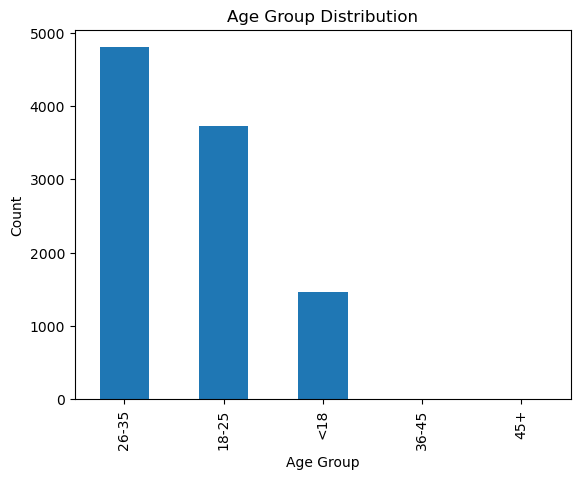

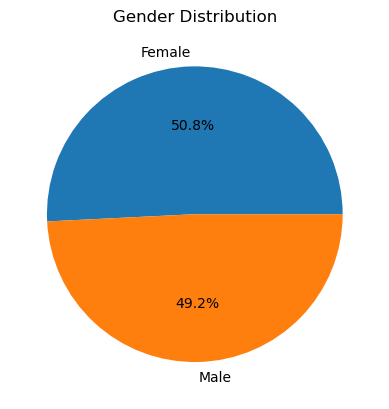

In [3]:
#EduPro Data Analysis Project
import pandas as pd

# File name
file = "data/EduPro Online Platform.xlsx"

# Load sheets
users = pd.read_excel(file, sheet_name="Users")
courses = pd.read_excel(file, sheet_name="Courses")
transactions = pd.read_excel(file, sheet_name="Transactions")

# Check shape (rows, columns)
print("Users Shape:", users.shape)
print("Courses Shape:", courses.shape)
print("Transactions Shape:", transactions.shape)

print("\nUsers Preview:")
print(users.head())

#checking null values
print("\nMissing Values in Users:")
print(users.isnull().sum())

print("\nMissing Values in Courses:")
print(courses.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())

# duplicate values
print("\nDuplicate UserIDs:", users["UserID"].duplicated().sum())
print("Duplicate CourseIDs:", courses["CourseID"].duplicated().sum())
print("Duplicate TransactionIDs:", transactions["TransactionID"].duplicated().sum())


print("\nData Types:")
print(users.dtypes)

# MERGE DATASETS 

# Merge Transactions with Users
merged_data = pd.merge(transactions, users, on="UserID", how="inner")

# Merge with Courses
merged_data = pd.merge(merged_data, courses, on="CourseID", how="inner")

print("\nMerged Data Shape:", merged_data.shape)

print("\nMerged Data Preview:")
print(merged_data.head())

# TOTAL ENROLLMENTS

total_enrollments = merged_data.shape[0]
print("\nTotal Enrollments:", total_enrollments)


# TOTAL REVENUE

total_revenue = merged_data["Amount"].sum()
print("\nTotal Revenue Generated:", total_revenue)


# AGE DISTRIBUTION

age_distribution = merged_data["Age"].describe()
print("\nAge Statistics:")
print(age_distribution)


# CREATE AGE GROUPS

bins = [0, 17, 25, 35, 45, 100]
labels = ["<18", "18-25", "26-35", "36-45", "45+"]

merged_data["AgeGroup"] = pd.cut(merged_data["Age"], bins=bins, labels=labels)

age_group_counts = merged_data["AgeGroup"].value_counts()

print("\nAge Group Distribution:")
print(age_group_counts)


# GENDER DISTRIBUTION

print("\nGender Distribution:")
print(merged_data["Gender"].value_counts())


# COURSE CATEGORY POPULARITY

print("\nCourse Category Distribution:")
print(merged_data["CourseCategory"].value_counts())

# COURSE LEVEL DISTRIBUTION

print("\nCourse Level Distribution:")
print(merged_data["CourseLevel"].value_counts())

# AGE GROUP vs COURSE CATEGORY

age_category = pd.crosstab(merged_data["AgeGroup"], merged_data["CourseCategory"])

print("\nAge Group vs Course Category:")
print(age_category)


# GENDER vs COURSE LEVEL

gender_level = pd.crosstab(merged_data["Gender"], merged_data["CourseLevel"])

print("\nGender vs Course Level:")
print(gender_level)

#Course Type Distribution
print("\nCourse Type Distribution:")
print(merged_data["CourseType"].value_counts())

#Average Courses Per Learner
avg_courses = merged_data.groupby("UserID").size().mean()
print("\nAverage Courses Per Learner:", round(avg_courses, 2))

# Enrollment Concentration
courses_per_user = merged_data.groupby("UserID").size()
print("\nCourses Per User Summary:")
print(courses_per_user.describe())

# Visualisations

import matplotlib.pyplot as plt
import seaborn as sns

# Age Group Distribution
merged_data['AgeGroup'].value_counts().plot(kind='bar')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()



gender_counts = merged_data['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()
